In [162]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv('train.csv')

#data1 = data.drop(['Id', 'MSZoning', 'Street', 'Alley', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinSF2','LotShape', 'LandContour', 'BsmtFinType2','FireplaceQu' ,'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenQual', 'Functional','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition'], axis = 1)
#data1.loc[np.isnan(data1["LotFrontage"]), 'LotFrontage'] = 0
#data1.loc[np.isnan(data1["LotArea"]), 'LotArea'] = 0
#data1.loc[np.isnan(data1["GarageYrBlt"]), 'GarageYrBlt'] = 0
data1 = data[['MSZoning' ,'SalePrice','GarageArea']]       

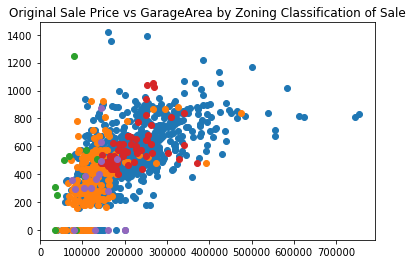

In [163]:
k = len(data1['MSZoning'].unique())
for i in data1['MSZoning'].unique():
    # select only the applicable rows
    ds = data1[data1['MSZoning'] == i]
    # plot the points
    plt.plot(ds[['SalePrice']],ds[['GarageArea']],'o')
plt.title("Original Sale Price vs GarageArea by Zoning Classification of Sale")
plt.show()



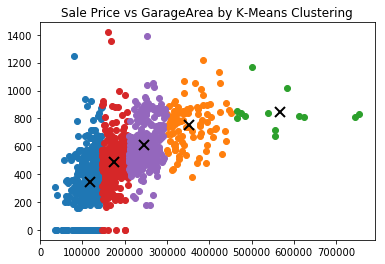

In [164]:
from sklearn import cluster
del data1['MSZoning']
kmeans = cluster.KMeans(n_clusters=k, n_init=100, max_iter=5000, algorithm='auto')
kmeans.fit(data1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    # select only data observations from the applicable cluster
    yr = data1.iloc[np.where(labels==i)]
    # plot the data observations
    plt.plot(yr['SalePrice'],yr['GarageArea'],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)
    plt.setp(lines,mew=2.0)
plt.title("Sale Price vs GarageArea by K-Means Clustering")
plt.show()
